In [3]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



# Шлях до файлу
zip_path = '/content/homework.zip'

# Розпакуймо
!unzip -q "$zip_path" -d /content/homework

# Перевірка наявності папок для кожної активності
data_dir = '/content/homework/data'
activities = ['idle', 'running', 'stairs', 'walking']

for activity in activities:
    activity_path = os.path.join(data_dir, activity)
    if not os.path.exists(activity_path):
        print(f"Directory for activity '{activity}' not found at {activity_path}")
    else:
        print(f"Found directory for activity '{activity}' with {len(os.listdir(activity_path))} files")

# Завантажимо один файл і переглянемо назви стовпців
sample_file = os.path.join(data_dir, 'walking', os.listdir(os.path.join(data_dir, 'walking'))[0])
sample_df = pd.read_csv(sample_file)
print(sample_df.columns)

# Оновлення функції обробки з урахуванням правильних назв стовпців
def extract_features(df):
    features = []
    for axis in ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']:  # Замість 'acc_x', 'acc_y', 'acc_z'
        features.append(df[axis].mean())
        features.append(df[axis].std())
        features.append(df[axis].min())
        features.append(df[axis].max())
    return np.array(features)

# Завантаження та обробка даних
data = {}
for activity in activities:
    activity_path = os.path.join(data_dir, activity)
    files = os.listdir(activity_path)
    data[activity] = [pd.read_csv(os.path.join(activity_path, file)) for file in files]

X = []
y = []

for activity, dfs in data.items():
    for df in dfs:
        X.append(extract_features(df))
        y.append(activity)

X = np.array(X)
y = np.array(y)

# Розбиття на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання моделей
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Порівняння результатів
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


ModuleNotFoundError: No module named 'google'

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Додаткові метрики для обох моделей
def print_metrics(y_true, y_pred, model_name):
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted')}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted')}")
    print("\n")

print_metrics(y_test, svm_predictions, "SVM")
print_metrics(y_test, rf_predictions, "Random Forest")


Metrics for SVM:
Accuracy: 0.9922660479505027
Precision: 0.991969585327892
Recall: 0.9922660479505027
F1 Score: 0.9920115599617152


Metrics for Random Forest:
Accuracy: 0.9984532095901005
Precision: 0.9984532095901005
Recall: 0.9984532095901005
F1 Score: 0.9984532095901005




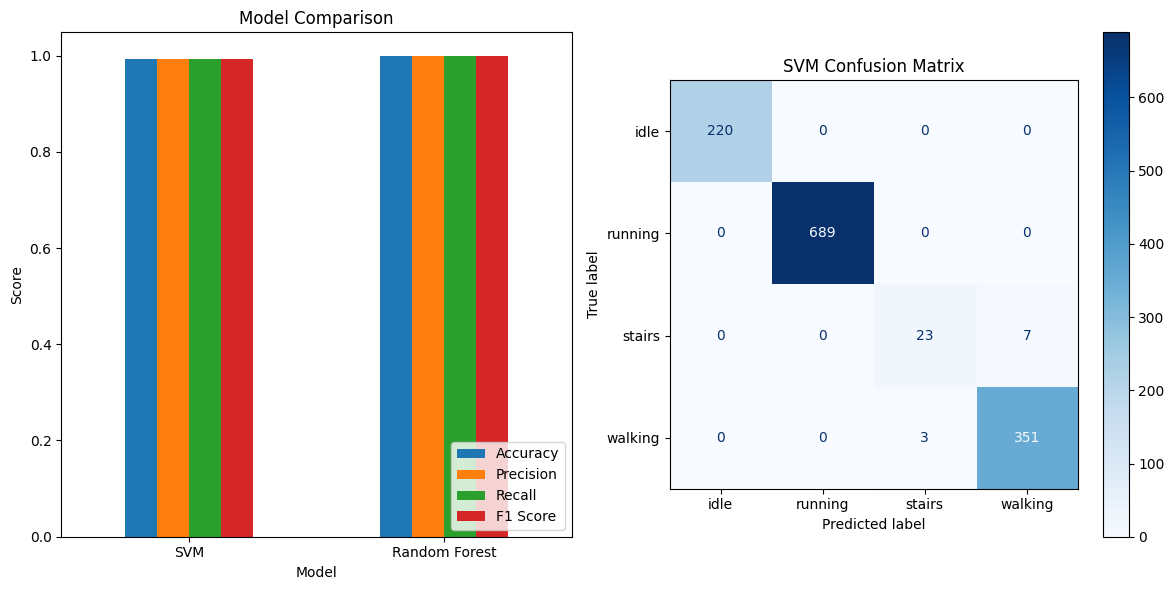

<Figure size 600x600 with 0 Axes>

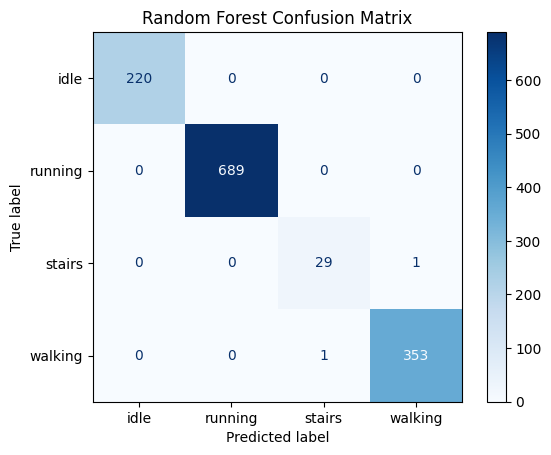

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


# Візуалізація результатів

# Порівняння метрик моделей
metrics = {
    'Model': ['SVM', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, svm_predictions), accuracy_score(y_test, rf_predictions)],
    'Precision': [precision_score(y_test, svm_predictions, average='weighted'), precision_score(y_test, rf_predictions, average='weighted')],
    'Recall': [recall_score(y_test, svm_predictions, average='weighted'), recall_score(y_test, rf_predictions, average='weighted')],
    'F1 Score': [f1_score(y_test, svm_predictions, average='weighted'), f1_score(y_test, rf_predictions, average='weighted')]
}

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

# Побудова графіків
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
metrics_df.plot(kind='bar', ax=plt.gca())
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')

# Матриця плутанини для SVM
plt.subplot(1, 2, 2)
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions, ax=plt.gca(), cmap='Blues')
plt.title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
# Матриця плутанини для Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()